# Module 7 Machine Learning

### Author: Kari Taylor

### This module 7 project will employ machine learning to build a model, make predictions, visualize the model, and draw conclusions from the data. 

### **Part 1: Chart a Straight Line**

### *Import External Dependencies*

In [1]:
import pandas as pd

Create a function to calculate Celsius temperatures to Fahrenheit 

In [2]:
c = lambda f: 5 / 9 * (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]

Load temps data into dataframe

In [4]:
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

Prepare axes and labels

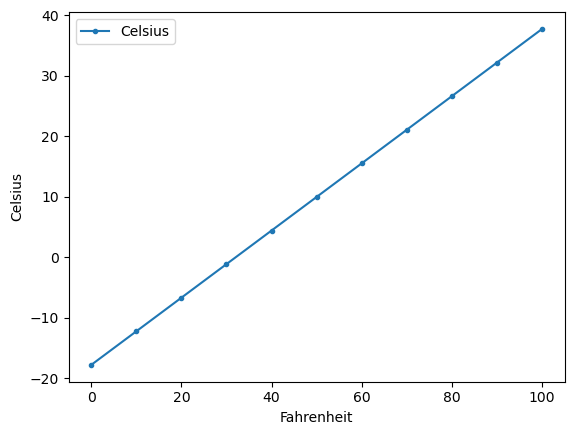

In [5]:
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')